In [1]:
import argparse
import pandas as pd
import numpy as np
import mylib.data_preprocessing as dpp

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
from keras.models import load_model

from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, SGD
from keras.layers import LeakyReLU

input  = 'C:/Users/Aditya Jethliya/Desktop/Bennett Project/Ourdata_cleaned_replaced_binary2.csv'
try:
    raw_data = pd.read_csv(input, header=0)
except:
    print("Dataset not exists.")
# X: input, Y: output
dataset = raw_data.values
X = dataset[:, 3:39].astype(float)
Y = dataset[:, 39]
encoder = LabelEncoder()
encoder_Y = encoder.fit_transform(Y)
matrix_Y = np_utils.to_categorical(encoder_Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, matrix_Y, test_size=0.2, random_state=42)
model = Sequential()
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=2, activation='softmax'))
model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=512, epochs=30, verbose=2, validation_data=(X_test, Y_test))

Using TensorFlow backend.


Train on 25148 samples, validate on 6288 samples
Epoch 1/30
 - 1s - loss: 0.4906 - accuracy: 0.7524 - val_loss: 1.0648 - val_accuracy: 0.5878
Epoch 2/30
 - 1s - loss: 0.3304 - accuracy: 0.8576 - val_loss: 0.7370 - val_accuracy: 0.6172
Epoch 3/30
 - 1s - loss: 0.2684 - accuracy: 0.8901 - val_loss: 0.4738 - val_accuracy: 0.7548
Epoch 4/30
 - 1s - loss: 0.2257 - accuracy: 0.9160 - val_loss: 0.3506 - val_accuracy: 0.8467
Epoch 5/30
 - 1s - loss: 0.1923 - accuracy: 0.9357 - val_loss: 0.2851 - val_accuracy: 0.8736
Epoch 6/30
 - 1s - loss: 0.1679 - accuracy: 0.9447 - val_loss: 0.2311 - val_accuracy: 0.9117
Epoch 7/30
 - 1s - loss: 0.1460 - accuracy: 0.9563 - val_loss: 0.1942 - val_accuracy: 0.9329
Epoch 8/30
 - 1s - loss: 0.1305 - accuracy: 0.9619 - val_loss: 0.1683 - val_accuracy: 0.9507
Epoch 9/30
 - 1s - loss: 0.1178 - accuracy: 0.9638 - val_loss: 0.1579 - val_accuracy: 0.9464
Epoch 10/30
 - 1s - loss: 0.1068 - accuracy: 0.9682 - val_loss: 0.1279 - val_accuracy: 0.9652
Epoch 11/30
 - 1s - 

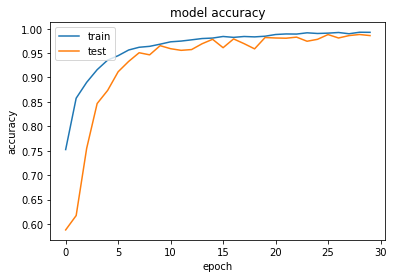

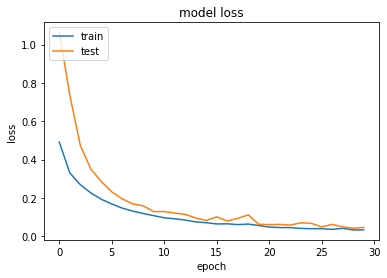

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model_accuracy_binary.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model_loss_binary.png')
plt.show()

In [3]:
import pandas as pd
Y_test1 = np.argmax(Y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_test)
labels = list(encoder.classes_)
tested = list(encoder.inverse_transform(Y_test1))
predicted = list(encoder.inverse_transform(y_pred))
y_actu = pd.Series(tested, name='Actual')
y_pred1 = pd.Series(predicted, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred1)
name = 'confusion_matrix_binary.csv'
with open(name, mode='w') as f:
    df_confusion.to_csv(f)

In [6]:
print(df_confusion)

Predicted    Non-Violent  Violent
Actual                           
Non-Violent         3684       22
Violent               67     2515


In [9]:
from sklearn.metrics import classification_report
print(classification_report(tested, predicted))

              precision    recall  f1-score   support

 Non-Violent       0.98      0.99      0.99      3706
     Violent       0.99      0.97      0.98      2582

    accuracy                           0.99      6288
   macro avg       0.99      0.98      0.99      6288
weighted avg       0.99      0.99      0.99      6288

